### Scikit Learn For Feature Selection

#### Feature Selection

The goal of feature selection in machine learning is to find the best set of features that allows one to build useful models of studied phenomena.

The data features that you use to train your machine learning models have a huge influence on the performance you can achieve.
Irrelevant or partially relevant features can negatively impact model performance.

Feature selection methods are intended to reduce the number of input variables to those that are believed to be most useful to a model in order to predict the target variable.

Feature Selection helps to:

1. Curse of dimensionality — Overfitting:
- **If we have more columns in the data than the number of rows, we will be able to fit our training data perfectly, but that won’t generalize to the new samples. And thus we learn absolutely nothing.**
2. Garbage In Garbage out:
- Most of the times, we will have many non-informative features. For Example, Name or ID variables. Poor-quality input will produce Poor-Quality output.

**Also, a large number of features make a model bulky, time-taking, and harder to implement in production.**

### Feature Selection Methods:

1. Univariate Selection
2. Feature Importance
3. Correlation Matrix with Heatmap


1. **Univariate Selection**

- Statistical tests can be used to select those features that have the strongest relationship with the output variable.
The scikit-learn library provides the **SelectKBest** class that can be used with a suite of different statistical tests to select a specific number of features.

In the example below, we use the chi-squared (chi²) statistical test for non-negative features to select 10 of the best features from the Mobile Price Range Prediction Dataset.

In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [3]:
data = pd.read_csv("./data/mobile_price/train.csv")
X = data.iloc[:,0:20]  
y = data.iloc[:,-1]    

In [4]:
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [5]:
#apply SelectKBest class to extract top 10 best features

bestfeatures = SelectKBest(score_func=chi2, k=7)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization 

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(7,'Score'))  #print 10 best features

            Specs          Score
13            ram  931267.519053
11      px_height   17363.569536
0   battery_power   14129.866576
12       px_width    9810.586750
8       mobile_wt      95.972863
6      int_memory      89.839124
15           sc_w      16.480319


In [7]:
from sklearn.feature_selection import mutual_info_classif

In [8]:
#apply SelectKBest class to extract top 15 best features

bestfeatures = SelectKBest(score_func=mutual_info_classif, k=15)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization 

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(15,'Score'))  #print 10 best features

            Specs     Score
13            ram  0.847524
6      int_memory  0.038203
0   battery_power  0.033588
11      px_height  0.031760
9         n_cores  0.028100
12       px_width  0.027324
3        dual_sim  0.020507
19           wifi  0.019124
4              fc  0.011991
10             pc  0.002574
17        three_g  0.001796
1            blue  0.000000
2     clock_speed  0.000000
5          four_g  0.000000
7           m_dep  0.000000


2. **Feature Importance**

You can get the feature importance of each feature of your dataset by using the feature importance property of the model.

Feature importance gives you a score for each feature of your data, the higher the score more important or relevant is the feature towards your output variable.

Feature importance is an inbuilt class that comes with **Tree Based Classifiers**, we will be using Extra Tree Classifier for extracting the top 10 features for the dataset.


In [9]:
import pandas as pd
import numpy as np
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier  #import extr trees classifier
import matplotlib.pyplot as plt

In [10]:
data = pd.read_csv("./data/mobile_price/train.csv")
X = data.iloc[:,0:20] 
y = data.iloc[:,-1] 

[0.06118073 0.01945776 0.03257556 0.01932736 0.03236934 0.01697748
 0.0350544  0.03269619 0.03528149 0.03276675 0.03316863 0.04755667
 0.04849106 0.39850028 0.03400028 0.03379207 0.034086   0.01424418
 0.01853028 0.01994352]


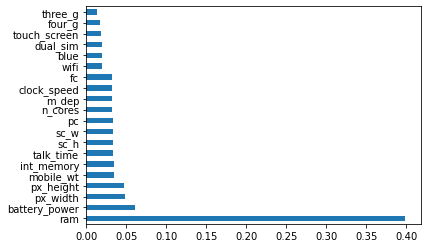

In [11]:
model = ExtraTreesClassifier()
model.fit(X,y)

print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

[0.07865405 0.00639014 0.02651887 0.00685749 0.02402837 0.00636334
 0.03643644 0.02380498 0.03792469 0.02206142 0.02764493 0.05545805
 0.05641783 0.49153193 0.02617504 0.02761838 0.02809957 0.00511254
 0.00656643 0.0063355 ]


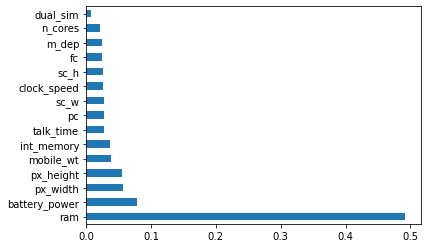

In [12]:
#random forest classifier

model = RandomForestClassifier()
model.fit(X,y)

print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.show()

**3.Correlation Matrix with Heatmap**

Correlation states how the features are related to each other or the target variable.

Correlation can be positive (increase in one value of feature increases the value of the target variable) or negative (increase in one value of feature decreases the value of the target variable)

Heatmap makes it easy to identify which features are most related to the target variable, we will plot heatmap of correlated features using the seaborn library.


In [13]:
import pandas as pd
import numpy as np
import seaborn as sns

In [14]:
data = pd.read_csv("./data/mobile_price/train.csv")
X = data.iloc[:,0:20]  #independent columns
y = data.iloc[:,-1]    #target column i.e price range

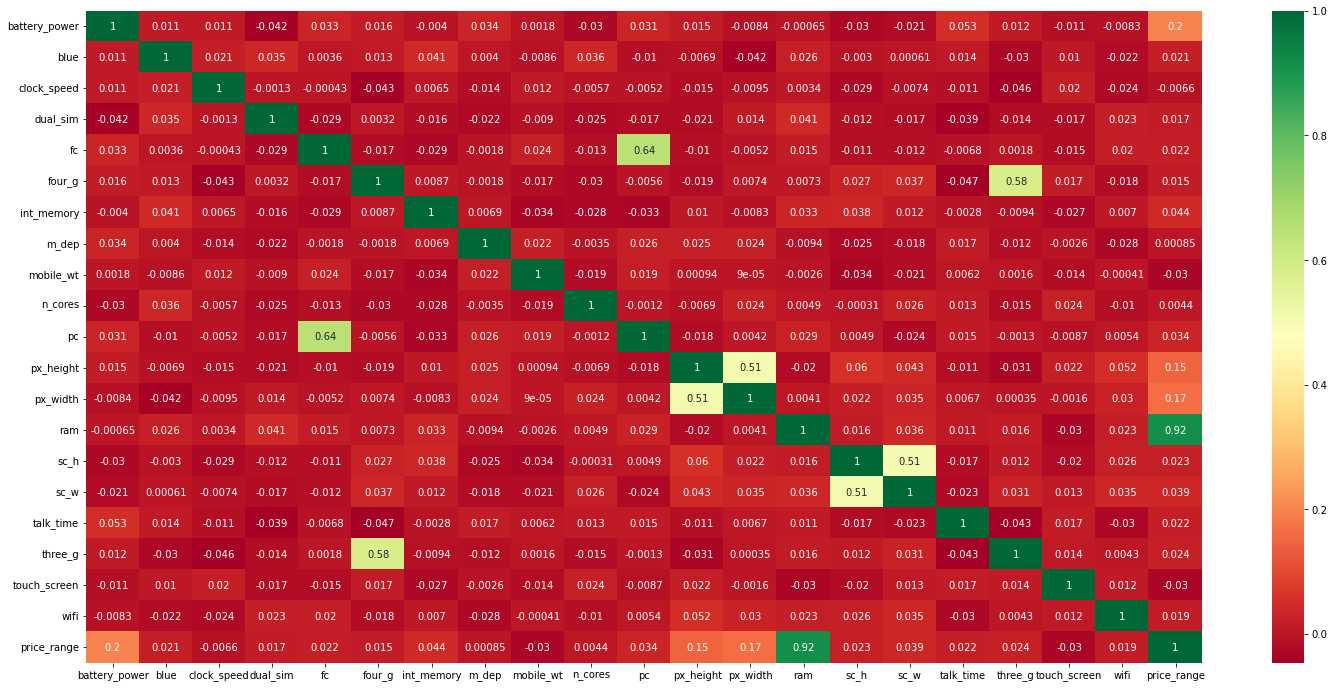

In [15]:
#get correlations of each features in dataset

corrmat = data.corr()   #get correlations table
top_corr_features = corrmat.index
plt.figure(figsize=(25,12))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

#### F-Test for Regression and Classification

An F-test is any statistical test in which the test statistic has an F-distribution under the null hypothesis. 

It is most often used when comparing statistical models that have been fitted to a data set, in order to identify the model that best fits the population from which the data were sampled. (*Wikipedia*)

F-Test does a hypothesis testing model X and Y where X is a model created by just a constant and Y is the model created by a constant and a feature.

The least square errors in both the models are compared and checks if the difference in errors between model X and Y are significant or introduced by chance.

F-Test is useful in feature selection as we get to know the significance of each feature in improving the model.
Scikit learn provides the Selecting K best features using F-Test.

For regression problems:

    '''
    sklearn.feature_selection.f_regression
    '''
    
For classification problems:

    '''
    sklearn.feature_selection.f_classif
    '''

In [33]:
df_glass = pd.read_csv('./data/glass.csv')

df_glass.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [38]:
#assign x and y

y = df_glass.Type
x = df_glass.drop('Type',axis = 1)

In [39]:
from sklearn.feature_selection import f_classif

In [40]:
#apply SelectKBest class to extract top 10 best features

bestfeatures = SelectKBest(score_func=f_classif, k=6)
fit = bestfeatures.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)

#concat two dataframes for better visualization 

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

  Specs      Score
2    Mg  65.544521
7    Ba  38.974602
3    Al  35.726676
1    Na  28.548019
5     K   8.748128
6    Ca   2.971426
4    Si   2.787330
8    Fe   2.710882
0    RI   1.608955


##### Regression

In [41]:
from sklearn.feature_selection import f_regression

In [42]:
# Creating the dataframe 
df_nba = pd.read_csv("./data/nba.csv")
  
# Print the dataframe
df_nba.head()

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,6-6,235.0,Marquette,6796117.0
2,John Holland,Boston Celtics,30.0,SG,27.0,6-5,205.0,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28.0,SG,22.0,6-5,185.0,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8.0,PF,29.0,6-10,231.0,NaN,5000000.0


In [43]:
#replace NaN in Salary

df_nba['Salary'] = df_nba['Salary'].fillna(df_nba['Salary'].mean())

In [44]:
#replace Nan in College

df_nba.College = df_nba.College.fillna(df_nba.College.value_counts().index[0])

In [45]:
df_nba.isnull().sum()

Name        1
Team        1
Number      1
Position    1
Age         1
Height      1
Weight      1
College     0
Salary      0
dtype: int64

In [46]:
#drop the name column
df_nba.drop("Name",axis=1,inplace=True)

In [47]:
df_nba.head()

,Team,Number,Position,Age,Height,Weight,College,Salary
0,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7.730337e+06
1,Boston Celtics,99.0,SF,25.0,6-6,235.0,Marquette,6.796117e+06
2,Boston Celtics,30.0,SG,27.0,6-5,205.0,Boston University,4.842684e+06
3,Boston Celtics,28.0,SG,22.0,6-5,185.0,Georgia State,1.148640e+06
4,Boston Celtics,8.0,PF,29.0,6-10,231.0,Kentucky,5.000000e+06


In [48]:
#assign x and y

y = df_nba.Salary
x = df_nba.drop('Salary',axis = 1)

In [51]:
import category_encoders as ce

ce_ordinal = ce.OrdinalEncoder(cols = ['Team','College','Position','Height'])

x = ce_ordinal.fit_transform(x)

/Users/admin/anaconda3/envs/dsr/lib/python3.6/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [52]:
x.head()

,Team,Number,Position,Age,Height,Weight,College
0,1,0.0,1,25.0,1,180.0,1
1,1,99.0,2,25.0,2,235.0,2
2,1,30.0,3,27.0,3,205.0,3
3,1,28.0,3,22.0,3,185.0,4
4,1,8.0,4,29.0,4,231.0,5


In [55]:
x = x.fillna(0)

In [56]:
#apply SelectKBest class to extract top 10 best features

bestfeatures = SelectKBest(score_func=f_regression, k=6)
fit = bestfeatures.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)

#concat two dataframes for better visualization 

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

      Specs      Score
3       Age  19.498407
5    Weight   7.375210
6   College   5.805370
1    Number   5.718242
4    Height   4.596166
2  Position   0.478757
0      Team   0.121059
